In [1]:
# import python libraries
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [2]:
pd.set_option("display.max.columns", None)

In [3]:
listings_df = pd.read_csv('listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [4]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [5]:
listings_df.shape

(3585, 95)

In [6]:
# drop columns that are not useful
droplist=['listing_url','scrape_id','jurisdiction_names','license','thumbnail_url','medium_url','picture_url','xl_picture_url'
        ,'host_thumbnail_url','host_picture_url','neighbourhood_group_cleansed','id', 'host_id', 'latitude', 'longitude',
          'calendar_updated','name','summary','description','experiences_offered','host_url','host_name',
        'host_location','host_neighbourhood','host_verifications','street', 'neighbourhood_cleansed',
        'city','state','market','smart_location', 'country_code','country','amenities','calendar_last_scraped',
         'last_scraped',]
listings_df.drop(droplist, axis=1, inplace=True)
listings_df.shape

(3585, 61)

In [7]:
missed_total = listings_df.isnull().sum().sort_values(ascending = False)
missed_percent = (listings_df.isnull().sum()/listings_df.isnull().count()).sort_values(ascending = False)
missed_data = pd.concat([missed_total,missed_percent],axis = 1, keys = ['Missed_total','Missed_percent'])
missed_data

,Missed_total,Missed_percent
has_availability,3585,1.000000
square_feet,3529,0.984379
monthly_price,2697,0.752301
weekly_price,2693,0.751185
security_deposit,2243,0.625662
...,...,...
availability_60,0,0.000000
guests_included,0,0.000000
extra_people,0,0.000000
minimum_nights,0,0.000000


In [8]:
listings_df.drop(set(listings_df.columns[listings_df.isnull().mean()>0.2]), axis=1, inplace = True)
listings_df.shape

(3585, 37)

In [9]:
listings_df.describe(include=np.object)

,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,zipcode,is_location_exact,property_type,room_type,bed_type,price,extra_people,calendar_last_scraped,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3585,3585,3114,3114,3114,3585,3585,3585,3042,3547,3585,3582,3585,3585,3585,3585,3585,3585,3585,3585,3585,3585
unique,1,1281,4,52,72,2,2,2,30,43,2,13,3,5,324,51,1,1,2,4,2,2
top,2016-09-07,2015-03-30,within an hour,100%,100%,f,t,t,Allston-Brighton,02116,t,Apartment,Entire home/apt,Real Bed,$150.00,$0.00,2016-09-06,f,f,strict,f,f
freq,3585,137,1384,2072,1210,3178,3577,2603,364,388,3080,2612,2127,3453,144,2211,3585,3585,2991,1582,3518,3348


In [ ]:
'name','summary','description','experiences_offered','host_url','host_name',
'host_location','host_neighbourhood','host_verifications','street', 'neighbourhood_cleansed',
'city','state','market','smart_location', 'country_code','country','amenities'

In [38]:
listings_df.host_since.value_counts() 

2015-03-30    137
2009-07-10     79
2013-10-14     61
2014-02-14     59
2014-10-09     50
             ... 
2016-07-12      1
2013-06-18      1
2015-08-31      1
2011-10-16      1
2016-01-17      1
Name: host_since, Length: 1281, dtype: int64

In [10]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 37 columns):
last_scraped                        3585 non-null object
host_since                          3585 non-null object
host_response_time                  3114 non-null object
host_response_rate                  3114 non-null object
host_acceptance_rate                3114 non-null object
host_is_superhost                   3585 non-null object
host_listings_count                 3585 non-null int64
host_total_listings_count           3585 non-null int64
host_has_profile_pic                3585 non-null object
host_identity_verified              3585 non-null object
neighbourhood                       3042 non-null object
zipcode                             3547 non-null object
is_location_exact                   3585 non-null object
property_type                       3582 non-null object
room_type                           3585 non-null object
accommodates                        3585

In [11]:
listings_df.head(15)

,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,2016-09-07,2015-04-15,NaN,NaN,NaN,f,1,1,t,f,Roslindale,02131,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,$250.00,1,$0.00,2,1125,0,0,0,0,2016-09-06,0,f,f,moderate,f,f,1
1,2016-09-07,2012-06-07,within an hour,100%,100%,f,1,1,t,t,Roslindale,02131,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,0,$0.00,2,15,26,54,84,359,2016-09-06,36,f,t,moderate,f,f,1
2,2016-09-07,2009-05-11,within a few hours,100%,88%,t,1,1,t,t,Roslindale,02131,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,1,$20.00,3,45,19,46,61,319,2016-09-06,41,f,f,moderate,t,f,1
3,2016-09-07,2013-04-21,within a few hours,100%,50%,f,1,1,t,f,NaN,NaN,f,House,Private room,4,1.0,1.0,2.0,Real Bed,$75.00,2,$25.00,1,1125,6,16,26,98,2016-09-06,1,f,f,moderate,f,f,1
4,2016-09-07,2014-05-11,within an hour,100%,100%,t,1,1,t,t,Roslindale,02131,t,House,Private room,2,1.5,1.0,2.0,Real Bed,$79.00,1,$0.00,2,31,13,34,59,334,2016-09-06,29,f,f,flexible,f,f,1
5,2016-09-07,2016-03-23,within a few hours,100%,95%,t,2,2,t,t,Roslindale,02131,t,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,$75.00,1,$0.00,2,1125,5,28,58,58,2016-09-06,8,f,f,flexible,f,f,1
6,2016-09-07,2013-05-25,within an hour,98%,96%,f,5,5,t,t,NaN,02131,f,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,$100.00,1,$25.00,1,1125,22,39,69,344,2016-09-06,57,f,f,strict,f,f,3
7,2016-09-07,2012-08-05,within a few hours,100%,100%,t,2,2,t,t,Roslindale,02131,t,House,Private room,2,2.0,1.0,1.0,Real Bed,$75.00,1,$15.00,1,1125,30,60,90,365,2016-09-06,67,f,f,moderate,t,t,2
8,2016-09-07,2012-10-24,within an hour,100%,100%,t,1,1,t,t,Roslindale,02131,t,Condominium,Private room,2,1.0,1.0,2.0,Real Bed,$58.00,2,$0.00,2,1125,12,42,72,347,2016-09-06,65,f,f,moderate,f,f,1
9,2016-09-07,2012-12-18,within an hour,100%,100%,t,2,2,t,t,Roslindale,02131,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,$229.00,4,$25.00,4,10,20,50,80,107,2016-09-06,33,f,f,strict,f,f,2


In [ ]:
 'host_since', 

Text(0.5, 1.0, 'Room Type')

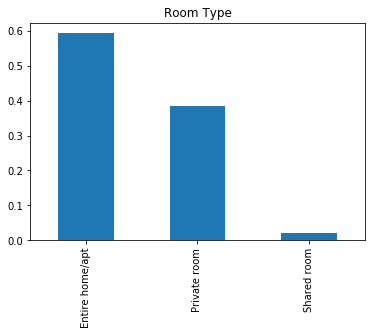

In [12]:
room_type = listings_df.room_type.value_counts()
(room_type/listings_df.shape[0]).plot(kind = 'bar')
plt.title('Room Type')

Text(0, 0.5, 'Count')

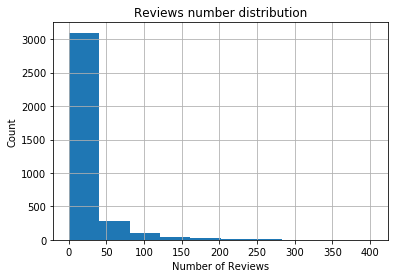

In [13]:
# num of reviews distribution 
listings_df.number_of_reviews.hist()
plt.title('Reviews number distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')

# Data Preparation/ Wrangling
In this step i will handle missing values and categorical variables.

In [14]:
def right_price(x):
    
    '''
    clean price column, remove "$" and "," sign and return it as float
    '''
    
    try:
        if ',' in x:
            x = x.replace(',','')
        x = x[1:]
        return float(x)
    except:
        return x

In [15]:
listings_df['price'] = listings_df.price.apply(lambda x:right_price(x))
listings_df['extra_people'] = listings_df.extra_people.apply(lambda x:right_price(x))

In [53]:
#handling host_response_time, converting to number 
def response_time_trans(x):
    if x == 'within an hour' or x == 'within a few hours':
        return 1
    elif x == 'within a day':
        return 0.5
    return 0

listings_df['host_response_time'] = listings_df['host_response_time'].apply(response_time_trans)

In [16]:
listings_df['host_response_rate'] = listings_df['host_response_rate'].str[:-1]
listings_df['host_response_rate'] = listings_df['host_response_rate'].astype('float128').astype('Int64')
listings_df['host_acceptance_rate']= listings_df['host_acceptance_rate'].str[:-1]
listings_df['host_response_rate'] = listings_df['host_response_rate'].astype('float128').astype('Int64')

In [17]:
calender_df = pd.read_csv('calendar.csv')

In [18]:
calender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [19]:
calender_df.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [20]:
calender_df['date'] = pd.to_datetime(calender_df.date)

In [21]:
calender_df['month'] = calender_df.date.dt.month
calender_df['year'] = calender_df.date.dt.year

In [22]:
(calender_df['price'].isna().sum())/calender_df['price'].shape[0]

0.5087157820748879

In [23]:
(calender_df['price'].notna().sum())/calender_df['price'].shape[0]

0.4912842179251121

In [24]:
calender_df['price'] = calender_df['price'].apply(lambda x:right_price(x))

In [25]:
calender_df.groupby(['month','available']).mean()['price']

month  available
1      f                   NaN
       t            182.799671
2      f                   NaN
       t            180.961028
3      f                   NaN
       t            181.818742
4      f                   NaN
       t            197.252890
5      f                   NaN
       t            193.712295
6      f                   NaN
       t            196.535302
7      f                   NaN
       t            202.486309
8      f                   NaN
       t            203.330142
9      f                   NaN
       t            237.047727
10     f                   NaN
       t            233.416248
11     f                   NaN
       t            202.924416
12     f                   NaN
       t            192.601915
Name: price, dtype: float64

Text(0.5, 0, 'Price (dollar)')

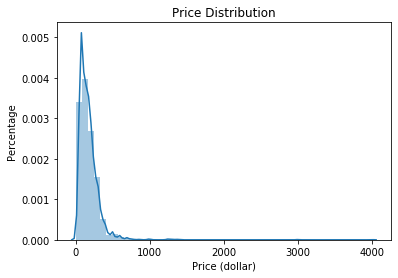

In [33]:
#histogram
sns.distplot(listings_df['price'])
plt.title('Price Distribution', fontsize=12)
plt.ylabel('Percentage', fontsize=10)
plt.xlabel('Price (dollar)', fontsize=10)

In [26]:
# group the listings by neighbourood and get the average price
listings_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Harvard Square        359.000000
Financial District    283.692308
Downtown Crossing     273.500000
Leather District      245.875000
Back Bay              245.457045
Chinatown             235.410256
Theater District      234.151515
South Boston          232.120370
Fenway/Kenmore        230.104418
West End              221.602941
Beacon Hill           212.080460
Charlestown           210.050633
South End             206.721477
Government Center     205.333333
Cambridge             203.000000
Downtown              196.500000
North End             195.512000
Roxbury               147.637931
Jamaica Plain         140.687898
Brookline             130.375000
Mission Hill          127.805825
East Boston           124.059829
Allston-Brighton      114.162088
West Roxbury          111.342857
Roslindale             99.160000
Dorchester             97.451282
Hyde Park              93.680000
Somerville             93.076923
Mattapan               72.000000
Chestnut Hill          70.750

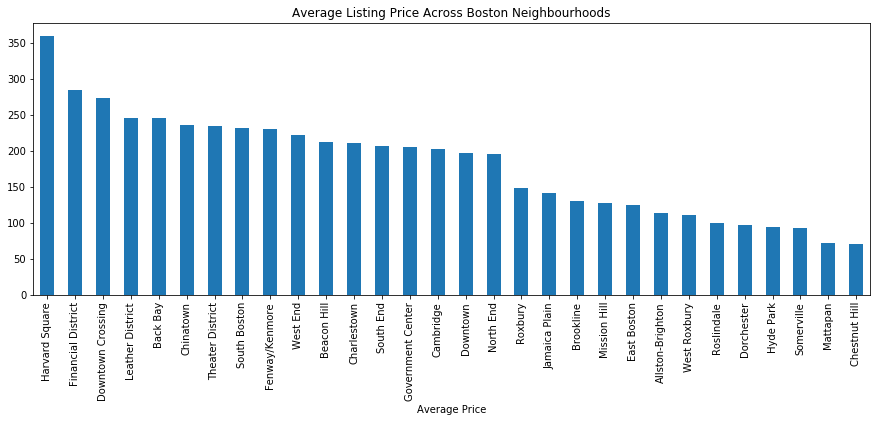

In [27]:
# grouped the listings by neighbourood and get the average price
(listings_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)).plot(kind="bar", figsize=(15,5));
plt.title("Average Listing Price Across Boston Neighbourhoods");
plt.xlabel('Neighbourhood');
plt.xlabel('Average Price');

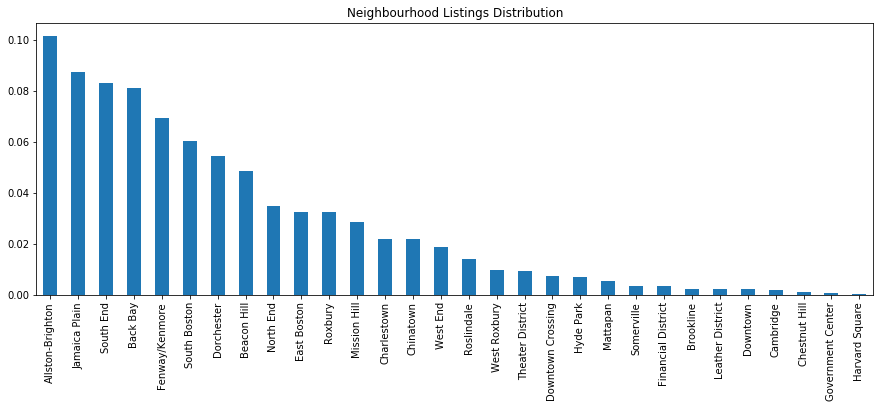

In [28]:
# neighbourhood distribution
neighbourhood = listings_df.neighbourhood.value_counts()

(neighbourhood/listings_df.shape[0]).plot(kind="bar",figsize=(15,5));
plt.title("Neighbourhood Listings Distribution");

In [29]:
neigh_dist = neighbourhood/listings_df.shape[0]
neigh_price = listings_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

Text(0, 0.5, 'Distribution')

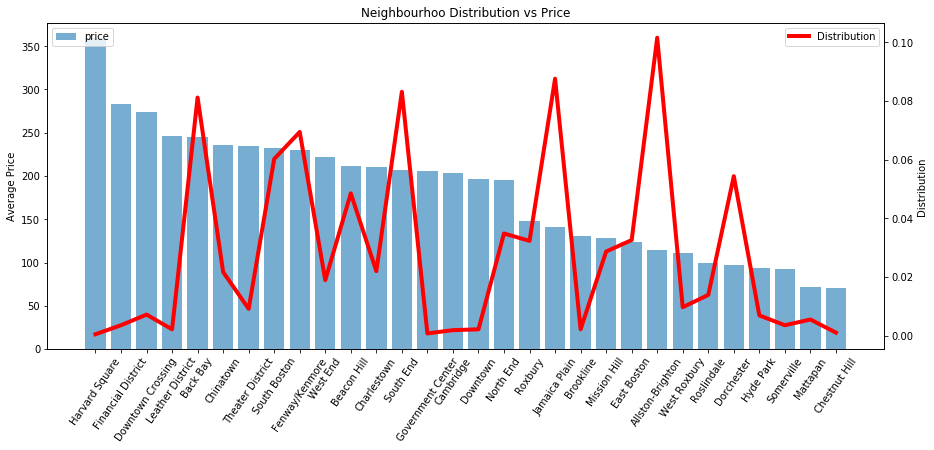

In [30]:
temp =pd.concat([neigh_price, neigh_dist], axis=1, sort=False)
temp.sort_values(by = 'price',ascending=False, inplace = True)

f, ax = plt.subplots(figsize=(15, 6))
plt.bar(temp.index,temp['price'], label = "price",alpha = 0.6)
plt.grid = (True)
plt.xticks(rotation = 55)
plt.ylabel('Average Price')
plt.legend(loc = 2)
plt.title('Neighbourhoo Distribution vs Price')
ax1 = ax.twinx()
plt.plot(temp.index, temp['neighbourhood'], 'r', lw = 4, label = 'Distribution')
plt.legend(loc = 1)
plt.ylabel('Distribution')

In [43]:
calender_df

,listing_id,date,available,price,month,year
0,12147973,2017-09-05,f,NaN,9,2017
1,12147973,2017-09-04,f,NaN,9,2017
2,12147973,2017-09-03,f,NaN,9,2017
3,12147973,2017-09-02,f,NaN,9,2017
4,12147973,2017-09-01,f,NaN,9,2017
...,...,...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN,9,2016
1308886,14504422,2016-09-09,f,NaN,9,2016
1308887,14504422,2016-09-08,f,NaN,9,2016
1308888,14504422,2016-09-07,f,NaN,9,2016


In [34]:
now = datetime.strptime('2020-09-20','%Y-%m-%d')
listings_df.host_since = listings_df.host_since.apply(lambda x: (now - datetime.strptime(x, '%Y-%m-%d')).days)

In [48]:
listings_df.zipcode.str[:5].astype('float128')

0       2131.0
1       2131.0
2       2131.0
3          NaN
4       2131.0
         ...  
3580    2143.0
3581    2446.0
3582    2141.0
3583    2145.0
3584    2145.0
Name: zipcode, Length: 3585, dtype: float128

In [50]:
listings_df.median()

host_since                        2239.0
host_response_rate                 100.0
host_listings_count                  2.0
host_total_listings_count            2.0
accommodates                         2.0
bathrooms                            1.0
bedrooms                             1.0
beds                                 1.0
price                              150.0
guests_included                      1.0
extra_people                         0.0
minimum_nights                       2.0
maximum_nights                    1125.0
availability_30                      4.0
availability_60                     16.0
availability_90                     37.0
availability_365                   179.0
number_of_reviews                    5.0
calculated_host_listings_count       2.0
dtype: float64

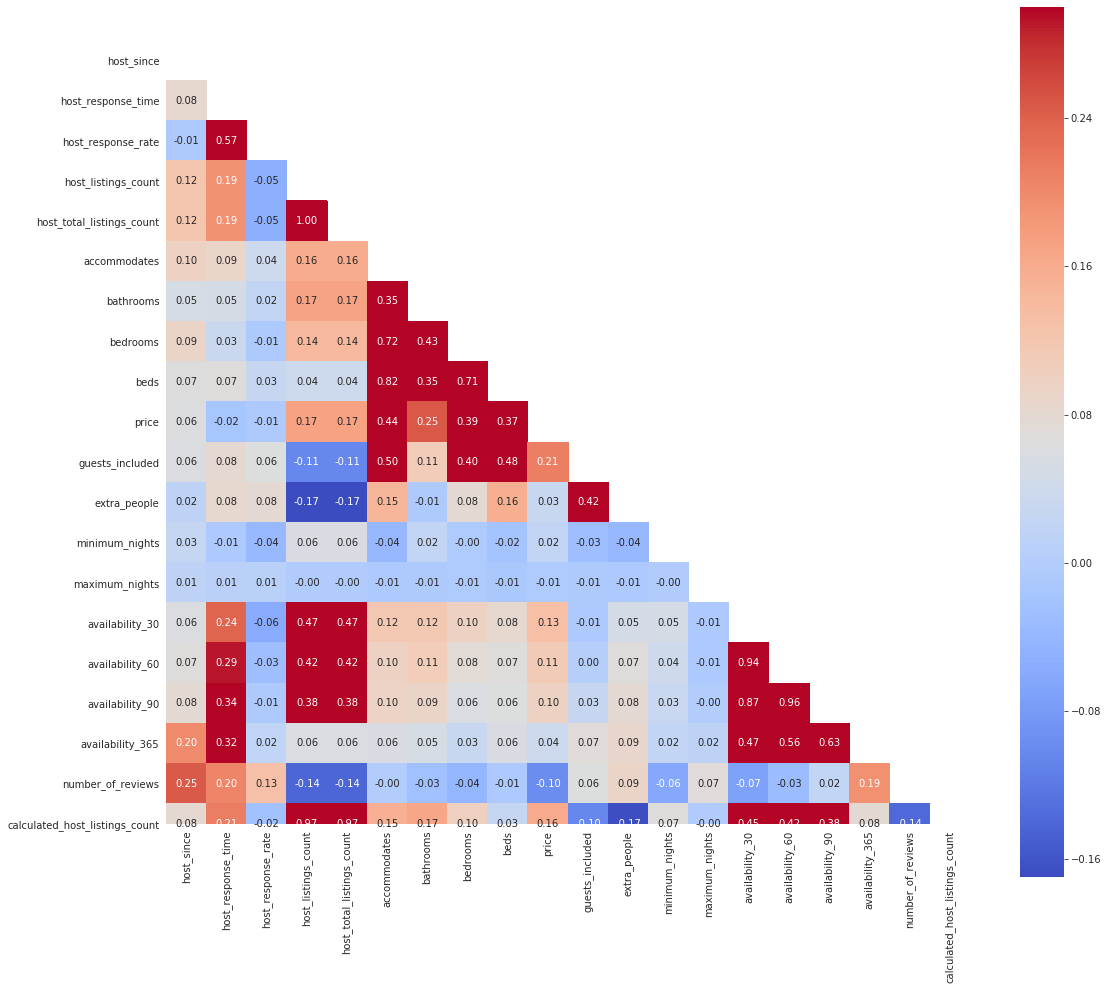

In [55]:
# visualize the correlation matrix
corr = listings_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 16))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, fmt='.2f', cmap='coolwarm')